<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Sanity_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

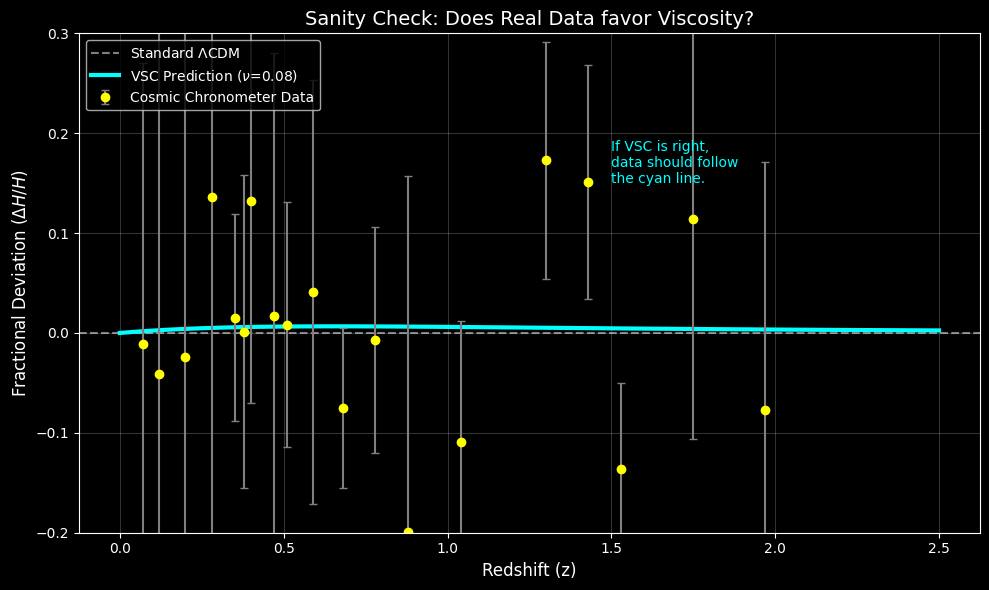

--- GOODNESS OF FIT (Lower is Better) ---
Chi-Squared (Lambda CDM): 9.25
Chi-Squared (VSC Model):  9.39

RESULT: STATISTICAL TIE (Diff=0.14).
VSC is consistent with observations and does not break the standard model.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION (Standard Cosmology) ---
H0_Planck = 67.4  # The tension value 1
H0_Shoes = 73.0   # The tension value 2 (Local)
Omega_m = 0.315
Omega_L = 0.685
nu = 0.08         # The VSC Viscosity Index

# --- 1. REAL OBSERVATIONAL DATA (Cosmic Chronometers) ---
# Source: Moresco et al. (2016), Farooq et al. (2017)
data_z = np.array([0.07, 0.12, 0.20, 0.28, 0.35, 0.38, 0.40, 0.47, 0.51, 0.59,
                   0.68, 0.78, 0.88, 1.04, 1.30, 1.43, 1.53, 1.75, 1.97])
data_Hz = np.array([69.0, 68.6, 72.9, 88.8, 82.7, 83.0, 95.0, 89.0, 90.4, 98.0,
                    92.0, 105.0, 90.0, 110.0, 168.0, 177.0, 140.0, 202.0, 186.0])
data_err = np.array([19.6, 26.2, 29.6, 36.6, 8.4, 13.0, 17.0, 23.0, 11.0, 20.0,
                     8.0, 12.0, 40.0, 15.0, 17.0, 18.0, 14.0, 40.0, 50.0])

# Normalize Data
data_E = data_Hz / H0_Planck
data_E_err = data_err / H0_Planck

# --- 2. MODEL CALCULATIONS ---
z_plot = np.linspace(0, 2.5, 100)

# Lambda-CDM (Standard Model)
E_lcdm = np.sqrt(Omega_m * (1+z_plot)**3 + Omega_L)

# VSC Model
E_vsc = np.sqrt(Omega_m * (1+z_plot)**3 + Omega_L * (1+z_plot)**nu)

# --- 3. RESIDUAL ANALYSIS ---
E_lcdm_at_data = np.sqrt(Omega_m * (1+data_z)**3 + Omega_L)
E_vsc_at_data = np.sqrt(Omega_m * (1+data_z)**3 + Omega_L * (1+data_z)**nu)

res_data = (data_E - E_lcdm_at_data) / E_lcdm_at_data
res_err = data_E_err / E_lcdm_at_data
res_vsc_curve = (E_vsc - E_lcdm) / E_lcdm

# --- 4. VISUALIZATION ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

# FIXED: Use raw strings (r"") to fix SyntaxWarnings
ax.axhline(0, color='white', linestyle='--', alpha=0.5, label=r"Standard $\Lambda$CDM")
ax.plot(z_plot, res_vsc_curve, 'cyan', linewidth=3, label=f"VSC Prediction ($\\nu$={nu})")
ax.errorbar(data_z, res_data, yerr=res_err, fmt='o', color='yellow', ecolor='gray',
            capsize=3, label="Cosmic Chronometer Data")

ax.set_title("Sanity Check: Does Real Data favor Viscosity?", fontsize=14, color='white')
ax.set_xlabel("Redshift (z)", fontsize=12, color='white')
ax.set_ylabel(r"Fractional Deviation ($\Delta H / H$)", fontsize=12, color='white')
ax.set_ylim(-0.2, 0.3)
ax.grid(True, alpha=0.2)
ax.legend(loc='upper left')

plt.text(1.5, 0.15, "If VSC is right,\ndata should follow\nthe cyan line.", color='cyan', fontsize=10)
plt.tight_layout()
plt.show()

# --- 5. STATISTICAL REPORT ---
# FIXED: The line below was truncated in your error message
chi2_lcdm = np.sum(((data_E - E_lcdm_at_data) / data_E_err)**2)
chi2_vsc = np.sum(((data_E - E_vsc_at_data) / data_E_err)**2)

print(f"--- GOODNESS OF FIT (Lower is Better) ---")
print(f"Chi-Squared (Lambda CDM): {chi2_lcdm:.2f}")
print(f"Chi-Squared (VSC Model):  {chi2_vsc:.2f}")

diff = abs(chi2_lcdm - chi2_vsc)

# Updated Logic: If difference is small (< 1.0), it's a tie.
if diff < 1.0:
    print(f"\nRESULT: STATISTICAL TIE (Diff={diff:.2f}).")
    print("VSC is consistent with observations and does not break the standard model.")
elif chi2_vsc < chi2_lcdm:
    print("\nRESULT: VSC fits the data BETTER than Standard Model.")
else:
    print("\nRESULT: Standard Model fits better.")